In [3136]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [3137]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3138]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3139]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3140]:
data_train.shape

(1460, 81)

In [3141]:
data_train.describe()
# just the numercal feature . 
# in the LotArea feature ----> have large std (maybe i have outliers)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3142]:
data_num=data_train.columns[(data_train.dtypes == float) | (data_train.dtypes == int)]
data_num

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

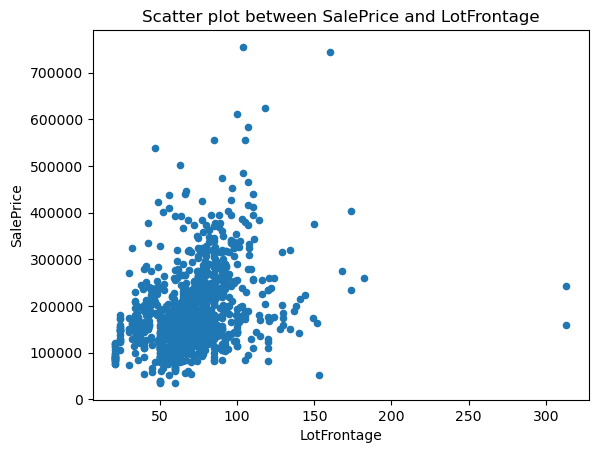

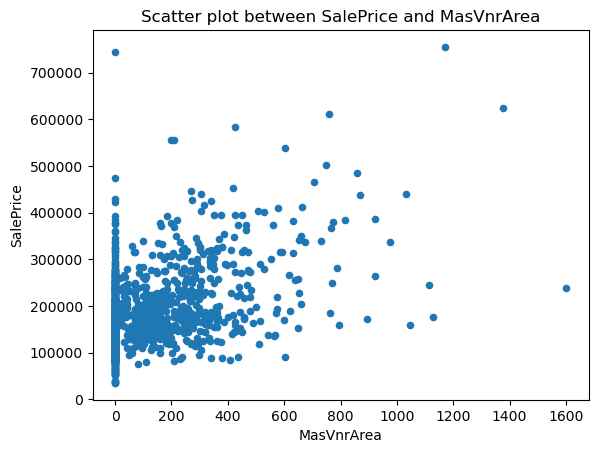

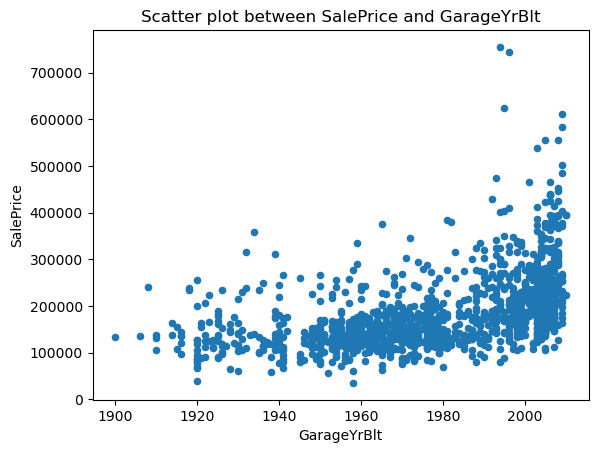

In [3143]:
for i in data_num:
    combine = pd.concat([data_train['SalePrice'], data_train[i]], axis=1)
    combine.plot.scatter(x=i, y='SalePrice')
    plt.title(f'Scatter plot between SalePrice and {i}')
    plt.show()

In [3144]:
data_train.query('LotFrontage>300') 
# i think this outlier 
# drop this outlier --- 935, 1299 . 
# the relation shape  is positve . 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3145]:
data_train.query('LotArea>55000')
# 250,314,336,707 
# I'm not sure for this  1379 , 1299 ,  452 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [3146]:
stats.zscore(data_train['LotArea']).sort_values().tail(10)  
# I want to identify values that significantly deviate from the mean, potentially indicating outliers . 
# large zscore --> 706 , 249 , 335 , 313 (maybe drop)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

In [3147]:
data_train.query('OverallQual==10')
# 524 maybe drop .

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [3148]:
data_train.query('OverallCond==2')
# 379 ---> drop .

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [3149]:
data_train.query('OverallCond==5 & SalePrice> 700000') 
# 1183 ---> drop i think 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [3150]:
data_train.query('OverallCond==6 & SalePrice>700000') 
# 692 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [3151]:
data_train.query('YearBuilt<1900 & SalePrice >400000') 
# 186 .

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [3152]:
data_train.query('YearRemodAdd<1970 & SalePrice> 300000') 
# 314 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [3153]:
data_train.query('MasVnrArea < 200 & SalePrice > 700000')
# 1183 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [3154]:
data_train.query('BsmtFinSF1>5000')
# 1299 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3155]:
data_train.query('400<BsmtFinSF2<600 & SalePrice >500000')  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [3156]:
data_train.query('TotalBsmtSF  > 6000')
#1299 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3157]:
data_train.query('`1stFlrSF` > 4000') 
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3158]:
data_train.query('LowQualFinSF > 500')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


In [3159]:
data_train.query('GrLivArea>4400') 
# 524 , 1299 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3160]:
data_train.query('BsmtFullBath==3') 
#739 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [3161]:
data_train.query('BsmtHalfBath==2') 
#598 , 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [3162]:
data_train.query('BedroomAbvGr==8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [3163]:
data_train.query('KitchenAbvGr==3 or KitchenAbvGr==0') 
# 49 , 810  , 995

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [3164]:
data_train.query('TotRmsAbvGrd==14 or TotRmsAbvGrd==2') 
# 534 ,636 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [3165]:
data_train.query('GarageArea>1200')  
# 1062 , 1191 , 1299 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [3166]:
data_train.query('OpenPorchSF> 500')
#469

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [3167]:
data_train.query('EnclosedPorch >500') 
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [3168]:
outlier_values = [250,314,707,706,249,335,313,524,379,1183,335,313,524,379,1183,1299,441,692,186,441,739,598,955,636,49,810,995,534,1062,1191,469,198, 1338]
data_train=data_train[data_train.Id.isin(outlier_values )==False]

In [3169]:
missing_value=data_train.isnull().sum().sum()
missing_value

7662

In [3170]:
missing_value=data_train.isnull().sum().sort_values().tail(20)

In [3171]:
(missing_value[missing_value != 0] / data_train.shape[0]).sort_values(ascending=False)

PoolQC          0.997209
MiscFeature     0.964410
Alley           0.937893
Fence           0.807397
MasVnrType      0.598744
FireplaceQu     0.474529
LotFrontage     0.178646
GarageType      0.051640
GarageCond      0.051640
GarageYrBlt     0.051640
GarageFinish    0.051640
GarageQual      0.051640
BsmtExposure    0.025122
BsmtFinType2    0.025122
BsmtFinType1    0.024424
BsmtCond        0.024424
BsmtQual        0.024424
MasVnrArea      0.005583
Electrical      0.000698
dtype: float64

i want to drop [poolqc, miscfeature , fence ,masvnrtype , fireplacequ ] .

In [3172]:
feature_to_drop=['Alley','PoolQC','MiscFeature','Fence','MasVnrType','FireplaceQu'] 
data_train.drop(columns=feature_to_drop,inplace=True)

feature_to_drop=['Alley','PoolQC','MiscFeature','Fence','MasVnrType','FireplaceQu'] 
data_test.drop(columns=feature_to_drop,inplace=True)



In [3173]:
data_train.shape 

(1433, 75)

In [3174]:
data_test.shape 

(1459, 74)

In [3175]:
data_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114., 128.,
       149., 313., 168., 182., 138., 152., 124.,  46.])

In [3176]:
mean_value=data_train['LotFrontage'].mean().round()

In [3177]:
#data_train['LotFrontage'].fillna(69.0,inplace=True)
#mode_value = data_train['LotFrontage'].mode().iloc[0]
data_train["LotFrontage"] = data_train["LotFrontage"].fillna(mean_value) 
data_test['LotFrontage']=data_test['LotFrontage'].fillna(mean_value)


In [3178]:
data_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [3179]:
data_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [3180]:
#data_train['GarageCond'].fillna(data_train['GarageCond'].mode(),inplace=True) 
mode_value = data_train['GarageCond'].mode().iloc[0]
data_train["GarageCond"] = data_train["GarageCond"].fillna(mode_value)

data_test["GarageCond"] = data_test["GarageCond"].fillna(mode_value)


In [3181]:
data_train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 2010., 1946., 1908., 1929., 1933.])

In [3182]:
data_train['GarageYrBlt'].mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

have strong corralation between garageyrblt and yearbuilt ---> sooooo  i wnat to drop this feature 

In [3183]:

data_train['GarageYrBlt'].corr(data_train['YearBuilt']) 

0.8273900087093394

In [3184]:
data_train.drop(columns=['GarageYrBlt'], inplace=True)
data_test.drop(columns=['GarageYrBlt'], inplace=True)

In [3185]:
#data_train['GarageType'].corr(data_train['GarageQual'])

In [3186]:
data_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [3187]:
mode_value = data_train['GarageFinish'].mode().iloc[0]
data_train["GarageFinish"] = data_train["GarageFinish"].fillna(mode_value)
data_test['GarageFinish']=data_test['GarageFinish'].fillna(mode_value)

In [3188]:
data_train.isnull().sum().sum()

334

In [3189]:
data_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [3190]:
mode_value = data_train['GarageQual'].mode().iloc[0]
data_train["GarageQual"] = data_train["GarageQual"].fillna(mode_value) 
data_test['GarageQual']=data_test['GarageQual'].fillna(mode_value)


In [3191]:
data_train.isnull().sum().sum()

260

In [3192]:
mode_value = data_train['BsmtExposure'].mode().iloc[0]
data_train["BsmtExposure"] = data_train["BsmtExposure"].fillna(mode_value)
data_test['BsmtExposure']=data_test['BsmtExposure'].fillna(mode_value)

In [3193]:
mode_value = data_train['BsmtFinType2'].mode().iloc[0]
data_train["BsmtFinType2"] = data_train["BsmtFinType2"].fillna(mode_value)
data_test['BsmtFinType2']=data_test['BsmtFinType2'].fillna(mode_value)

In [3194]:
mode_value = data_train['BsmtFinType1'].mode().iloc[0]
data_train["BsmtFinType1"] = data_train["BsmtFinType1"].fillna(mode_value)
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna(mode_value)

In [3195]:
mode_value = data_train['BsmtCond'].mode().iloc[0]
data_train["BsmtCond"] = data_train["BsmtCond"].fillna(mode_value)
data_test['BsmtCond']=data_test['BsmtCond'].fillna(mode_value)

In [3196]:
mode_value = data_train['BsmtQual'].mode().iloc[0]
data_train["BsmtQual"] = data_train["BsmtQual"].fillna(mode_value)
data_test['BsmtQual']=data_test['BsmtQual'].fillna(mode_value)

In [3197]:
data_train.drop(data_train[data_train['Electrical'].isnull()].index, inplace=True)
data_test.drop(data_test[data_test['Electrical'].isnull()].index,inplace=True)

In [3198]:
mode_value = data_train['GarageType'].mode().iloc[0]
data_train["GarageType"] = data_train["GarageType"].fillna(mode_value)
data_test["GarageType"] = data_test["GarageType"].fillna(mode_value)

In [3199]:
mean_value=data_train['MasVnrArea'].mean().round()
data_train["MasVnrArea"] = data_train["MasVnrArea"].fillna(mode_value) 
data_test["MasVnrArea"] = data_test["MasVnrArea"].fillna(mode_value) 

In [3200]:
data_train.isnull().sum().sum()

0

In [3201]:
data_train.isnull().sum().sort_values().tail(10)

Foundation     0
ExterCond      0
ExterQual      0
MasVnrArea     0
Exterior2nd    0
Exterior1st    0
RoofMatl       0
RoofStyle      0
YearBuilt      0
SalePrice      0
dtype: int64

In [3202]:
data_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [3203]:
data_train['BsmtFinType1'].mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [3204]:
data_train['BsmtFinType1']=data_train['BsmtFinType1'].fillna("Unf")
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna('Unf')

In [3205]:
data_train.isnull().sum().sum()

0

In [3206]:
data_train.shape

(1432, 74)

In [3207]:
data_train['Houseage']=data_train['YrSold']-data_train['YearBuilt']
data_test['Houseage']=data_test['YrSold']-data_test['YearBuilt']

In [3208]:
data_train['Houseremodelage']=data_train['YrSold']-data_train['YearRemodAdd']
data_test['Houseremodelage']=data_test['YrSold']-data_train['YearRemodAdd']

In [3209]:
data_train['totalSF']=data_train['1stFlrSF']+data_train['2ndFlrSF']+data_train['BsmtFinSF1']+data_train['BsmtFinSF2']
data_test['totalSF']=data_test['1stFlrSF']+data_test['2ndFlrSF']+data_test['BsmtFinSF1']+data_test['BsmtFinSF2']

In [3210]:
data_train['totalarea']=data_train['GrLivArea']+data_train['TotalBsmtSF']
data_test['totalarea']=data_test['GrLivArea']+data_test['TotalBsmtSF']


In [3211]:
data_train['totalbaths']=data_train['BsmtFullBath']+data_train['FullBath']+0.5*(data_train['BsmtFinSF2'])
data_test['totalbaths']=data_test['BsmtFullBath']+data_test['FullBath']+0.5*(data_test['BsmtFinSF2'])

In [3212]:
data_train['totalporchsf']=data_train['OpenPorchSF']+data_train['EnclosedPorch']+data_train['ScreenPorch']
data_test['totalporchsf']=data_test['OpenPorchSF']+data_test['EnclosedPorch']+data_test['ScreenPorch']


In [3213]:
data_train=data_train.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])
data_test=data_test.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

In [3214]:
data_train.shape

(1432, 62)

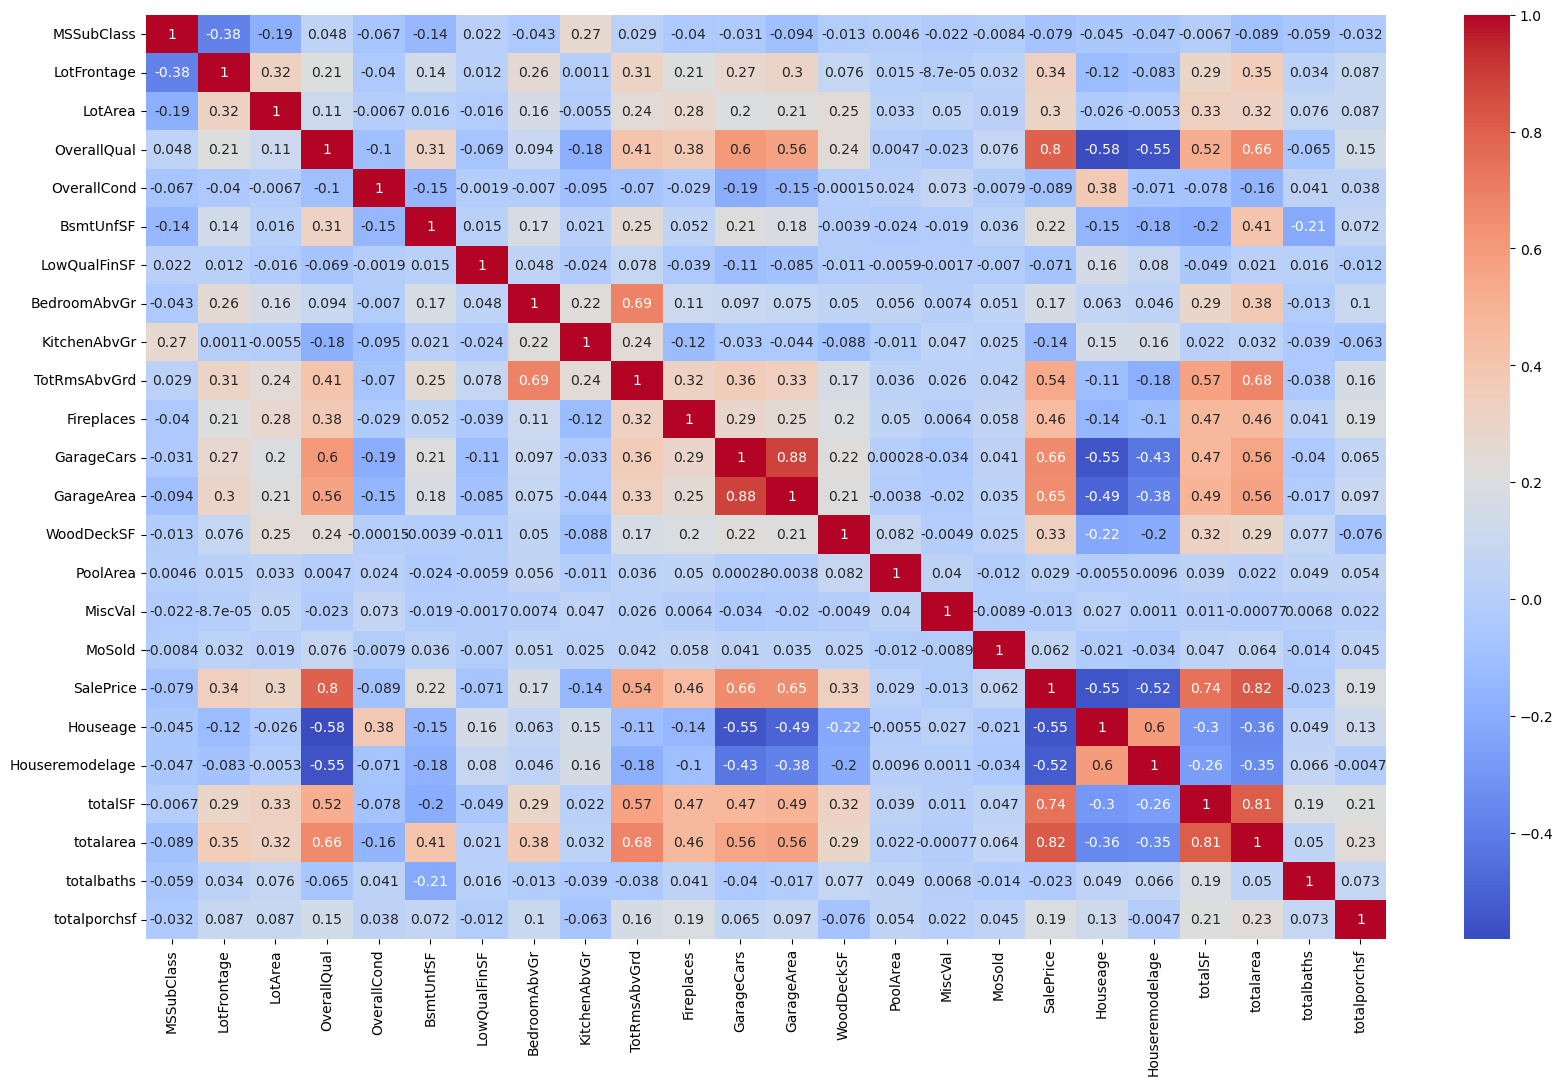

In [3215]:
correlation_matrix = data_train.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True)
plt.show()

In [3216]:
#GarageArea , GarageCars ---> have big corr ( drop one of them) 
# OverallQual ,SalePrice --> big corr  ( drop overallquall)
#totalarea , totalsf --->  huge corr ()
# totalarea , saleprise ---> huge corr  ()

In [3217]:
feature_to_drop=['GarageCars','OverallQual']
data_train.drop(columns=feature_to_drop,inplace=True)
data_test.drop(columns=feature_to_drop,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16440\3244629186.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['SalePrice'], fit=norm);


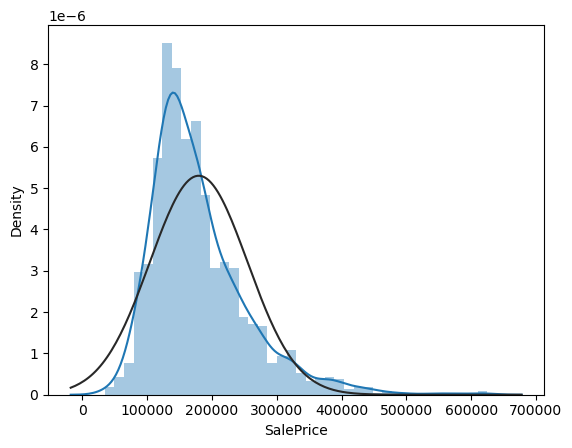

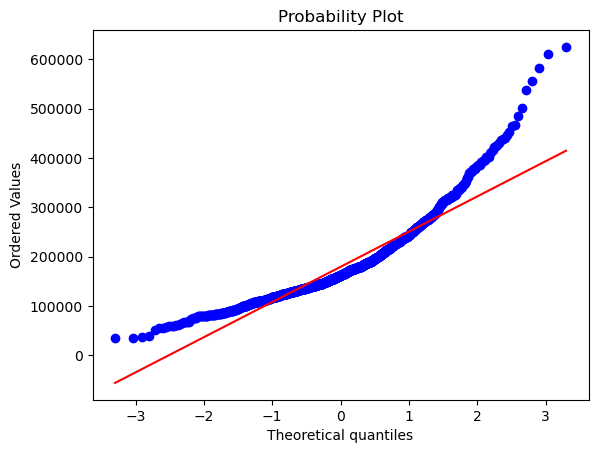

In [3218]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

In [3219]:
data_train['SalePrice']=np.log(data_train['SalePrice'])

C:\Users\User\AppData\Local\Temp\ipykernel_16440\1802944375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['SalePrice'], fit=norm);


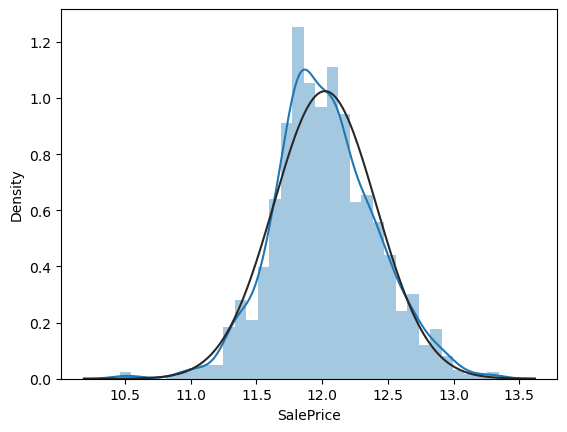

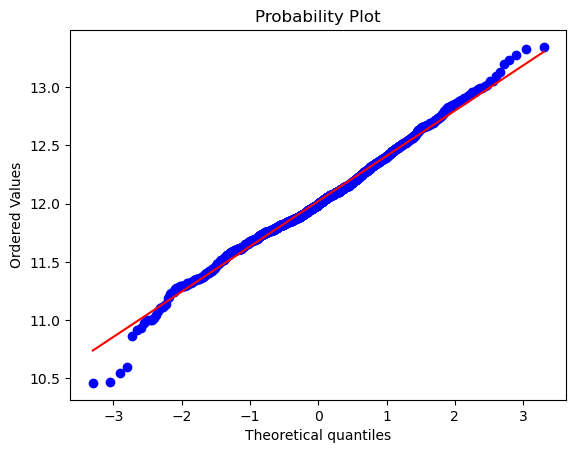

In [3220]:
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

In [3221]:
object_data=data_train.columns[(data_train.dtypes == object) ]
object_data

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [3222]:
# now i have more of object data ---> one hot encoding or order incodeing .

In [3223]:
unique_counts = {}
for i in object_data:
    unique_count = data_train[i].nunique()
    unique_counts[i] = unique_count
print("Number of unique values in each feature:")
for column, count in unique_counts.items():
    print(f"{column}: {count}")

Number of unique values in each feature:
MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 7
Exterior1st: 15
Exterior2nd: 16
MasVnrArea: 323
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
BsmtFinType2: 6
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
GarageType: 6
GarageFinish: 3
GarageQual: 5
GarageCond: 5
PavedDrive: 3
SaleType: 9
SaleCondition: 6


In [3224]:
order_enco=['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', 
     'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [3225]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_train [order_enco] = encoder.fit_transform(data_train[order_enco])
data_test [order_enco] = encoder.fit_transform(data_test[order_enco])

In [3226]:
data_train['LotShape']

0       3.0
1       3.0
2       0.0
3       0.0
4       0.0
       ... 
1455    3.0
1456    3.0
1457    3.0
1458    3.0
1459    3.0
Name: LotShape, Length: 1432, dtype: float64

In [3227]:
one_hot_enco=['Street','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [3228]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [3229]:
data_train[ohe_cols].head()

,Street,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,Electrical,SaleType,MSZoning,SaleCondition,Heating,GarageType,RoofMatl
0,Pave,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,SBrkr,WD,RL,Normal,GasA,Attchd,CompShg
1,Pave,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,MetalSd,MetalSd,CBlock,SBrkr,WD,RL,Normal,GasA,Attchd,CompShg
2,Pave,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,SBrkr,WD,RL,Normal,GasA,Attchd,CompShg
3,Pave,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,BrkTil,SBrkr,WD,RL,Abnorml,GasA,Detchd,CompShg
4,Pave,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,SBrkr,WD,RL,Normal,GasA,Attchd,CompShg


In [3230]:
from sklearn.preprocessing import OneHotEncoder
ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
            'RoofStyle', 'Exterior1st', 'Exterior2nd',  'Foundation', 'Electrical',
            'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl','BsmtFinType2','GarageCond']
for i in ohe_cols:
    dummies = pd.get_dummies(data_train[i], prefix=i)  # Get one-hot encoded DataFrame for the current column
    data_train = pd.concat([data_train, dummies], axis=1)  # Concatenate the one-hot encoded DataFrame with data_train
    data_train.drop(columns=[i], inplace=True)  # Drop the original column from data_train

In [3231]:
from sklearn.preprocessing import OneHotEncoder
ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
            'RoofStyle', 'Exterior1st', 'Exterior2nd',  'Foundation', 'Electrical',
            'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl','BsmtFinType2','GarageCond']
for i in ohe_cols:
    dummies = pd.get_dummies(data_test[i], prefix=i)  # Get one-hot encoded DataFrame for the current column
    data_test = pd.concat([data_test, dummies], axis=1)  # Concatenate the one-hot encoded DataFrame with data_test
    data_test.drop(columns=[i], inplace=True)  # Drop the original column from data_test

In [3232]:
print(data_train.shape)
print(data_test.shape)

(1432, 200)
(1459, 186)


In [3233]:
data_train = data_train.drop(columns=[ 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_2.5Fin',
                                    'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Electrical_Mix',
                                    'Heating_Floor', 'Heating_OthW', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll'])



In [3234]:
print(data_train.shape)
print(data_test.shape)

(1432, 187)
(1459, 186)


In [3235]:
data_train.dtypes[data_train.dtypes =='object']

MasVnrArea    object
dtype: object

In [3236]:
data_train['MasVnrArea'].unique()

array([196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0,
       380.0, 281.0, 640.0, 200.0, 246.0, 132.0, 650.0, 101.0, 412.0,
       272.0, 456.0, 1031.0, 178.0, 573.0, 344.0, 287.0, 167.0, 1115.0,
       40.0, 104.0, 576.0, 443.0, 468.0, 66.0, 22.0, 284.0, 76.0, 203.0,
       68.0, 183.0, 48.0, 28.0, 336.0, 600.0, 768.0, 480.0, 220.0, 184.0,
       1129.0, 116.0, 135.0, 266.0, 85.0, 309.0, 136.0, 288.0, 70.0,
       320.0, 50.0, 120.0, 436.0, 252.0, 84.0, 664.0, 226.0, 300.0, 653.0,
       112.0, 491.0, 268.0, 748.0, 98.0, 275.0, 138.0, 205.0, 262.0,
       128.0, 260.0, 153.0, 64.0, 312.0, 16.0, 922.0, 142.0, 290.0, 127.0,
       506.0, 297.0, 'Attchd', 604.0, 254.0, 36.0, 102.0, 481.0, 108.0,
       302.0, 172.0, 399.0, 270.0, 46.0, 210.0, 174.0, 348.0, 315.0,
       299.0, 340.0, 166.0, 72.0, 31.0, 34.0, 238.0, 1600.0, 365.0, 56.0,
       150.0, 278.0, 256.0, 225.0, 370.0, 388.0, 175.0, 296.0, 146.0,
       113.0, 176.0, 616.0, 30.0, 106.0, 870.0, 362.0, 530.0, 5

In [3237]:
data_train['MasVnrArea'].values.tolist().count('Attchd')

8

In [3238]:
# ok i have 8 attchd ---> i can drop it or replace it  . 
if 'Attchd' in data_train['MasVnrArea'].values:
    data_train['MasVnrArea'] = data_train['MasVnrArea'].replace('Attchd', 150)

if 'Attchd' in data_test['MasVnrArea'].values:
    data_test['MasVnrArea'] = data_test['MasVnrArea'].replace('Attchd', 150)

In [3239]:
#data_train['MasVnrArea'].unique()

In [3240]:
print(data_train.shape)
print(data_test.shape)

(1432, 187)
(1459, 186)


In [3241]:
X = data_train.drop('SalePrice', axis=1)
y = data_train['SalePrice']

In [3242]:
X.

SyntaxError: invalid syntax (3422770349.py, line 1)

In [ ]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1432, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
X_test

array([[-0.87352363, -1.04487547,  0.97949118, ..., -0.08900862,
        -0.07257947,  0.19513577],
       [-0.87352363,  0.11698986, -0.22093675, ..., -0.08900862,
        -0.07257947,  0.19513577],
       [-0.87352363,  1.95660997,  0.68434848, ..., -0.08900862,
        -0.07257947,  0.19513577],
       ...,
       [ 0.79127055,  0.60110042, -0.559508  , ..., -0.08900862,
        -0.07257947,  0.19513577],
       [ 1.50475377, -1.23851969, -0.54507944, ..., -0.08900862,
        -0.07257947,  0.19513577],
       [-0.87352363, -0.94805336, -0.31236527, ..., -0.08900862,
        -0.07257947,  0.19513577]])

In [ ]:
RFR = RandomForestRegressor(random_state=42) 
RFR.fit(X_train,y_train)
y_pred=RFR.predict(X_test)
print('mean absolute error is : ' ,mean_absolute_error(y_pred,y_test))
print('mean square error is :',mean_squared_error(y_pred,y_test))
print('r2_score is :',r2_score(y_pred,y_test))

mean absolute error is :  0.0938032113802149
mean square error is : 0.017937368619496675
r2_score is : 0.840223061282313


In [ ]:
XGB = XGBRegressor(verbosity=0)
XGB.fit(X_train,y_train) 
print('mean absolute error is : ', mean_absolute_error(y_pred,y_test))
print('mean square error is : ',mean_squared_error(y_pred,y_test))
print('R2_score is :',r2_score(y_pred,y_test))

mean absolute error is :  0.0938032113802149
mean square error is :  0.017937368619496675
R2_score is : 0.840223061282313


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

models = [ rf_model, xgb_model]
model_names = [ 'Random Forest Regressor', 'XGBoost Regressor']

for model, name in zip(models, model_names):
    print(f"Model: {name}")
    
    # Set the number of folds for cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    
    cv_scores = cross_val_score(model, X, y, cv=kfold)

    print("Cross-validation scores:", cv_scores)
    mean_score = cv_scores.mean()
    std_dev_score = cv_scores.std()

    print(f"Mean CV score: {mean_score:.2f}")
    print(f"Standard Deviation of CV scores: {std_dev_score:.2f}")
    print('\n')

Model: Random Forest Regressor
Cross-validation scores: [0.87842653 0.88059537 0.86541581 0.89293806 0.8704477 ]
Mean CV score: 0.88
Standard Deviation of CV scores: 0.01


Model: XGBoost Regressor
Cross-validation scores: [0.88804717 0.86470555 0.85911393 0.88600805 0.88998534]
Mean CV score: 0.88
Standard Deviation of CV scores: 0.01




In [3245]:
XGB.fit(X_train,y_train)
rf_model_submission = RFR.predict(data_test)
xgb_model_submission = XGB.predict(data_test)

rf_model_submission_df = pd.DataFrame({'Id':data_test['Id'], 'SalePrice':rf_model_submission})
xgb_model_submission_df = pd.DataFrame({'Id':data_test['Id'], 'SalePrice':xgb_model_submission})

rf_model_submission_df.to_csv('rf_model_submission.csv')
xgb_model_submission_df.to_csv('xgb_model_submission.csv')



c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values